**Linear Regression Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random

In [ ]:
!pip install plotly


In [ ]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

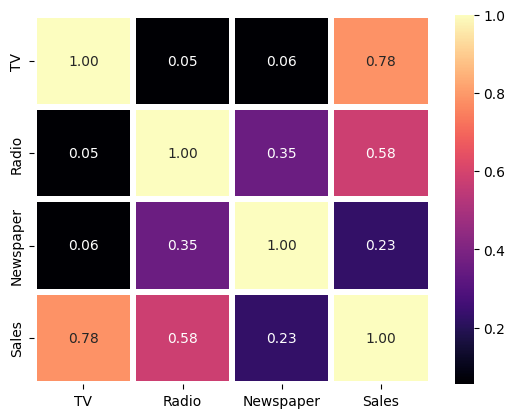

In [ ]:
dt=df.select_dtypes(include='number')
sns.heatmap(dt.corr(),annot=True,cmap='magma',fmt='0.2f',linewidth=3)

In [ ]:
fig=px.scatter(df,x='Newspaper',y='Radio',color='Sales',title='Scatter For Radio vs Newspaper')
fig.show()

In [ ]:
fig=px.scatter(df,x='Radio',y='Sales',color='Sales',title='Scatter For Radio vs Sales')
fig

In [ ]:
fig=px.scatter(df,x='Sales',y='TV',color='Sales',title='Scatter For Sales VS TV')
fig

In [ ]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.318898
197,0.596212,0.187500,0.053650,0.440945
198,0.956713,0.846774,0.579595,0.940945


In [ ]:
x=df_scaled.drop(columns='Sales')
y=df_scaled['Sales']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
def MSE(x,y,w,b):
    x=np.array(x)
    y=np.array(y)
    n=len(y)
    y_pre=np.dot(x,w)+b
    summation=0
    for i in range(n):
        summation+=((y[i]-y_pre[i])**2)
    return summation/n

In [ ]:
def R2_score(x,y,w,b):
    g=MSE(x,y,w,b)/np.var(y)
    return (1-g)*100

In [ ]:
def Batch_Gradient_Descent(x_training,y_training,learning_rate,epoch,w,b):
    x_training=np.array(x_training)
    y_training=np.array(y_training)
    if y_training.ndim==1:
        y_training=y_training.reshape(-1,1)
    n=len(x_training)
    w=np.zeros((x_training.shape[1],1))
    loss=[]
    epoch_save=[]
    for i in range(epoch):
        ypred=np.dot(x_training,w)+b
        w_der=(-2/n)*((np.dot(x_training.T,(y_training-ypred))))
        b_der=(-2/n)*(np.sum(y_training-ypred))
        w-=learning_rate*w_der
        b-=learning_rate*b_der
        if i%2==0:
            epoch_save.append(i)
            loss.append(MSE(x_training,y_training,w,b))
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_save, loss, linestyle='-', color='blue', marker='o', markersize=5, markerfacecolor='red', label='MSE Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Batch Gradient Descent - Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    return w,b

In [ ]:
def Stochastic_Gradient_Descent(x_training, y_training, learning_rate, epoch, w, b):
    x_training = np.array(x_training)
    y_training = np.array(y_training)

    if y_training.ndim == 1:
        y_training = y_training.reshape(-1, 1)

    n = x_training.shape[0]  # Get correct number of samples
    loss = []
    epoch_save = []

    for j in range(epoch):
        randomsample = np.random.permutation(n)  # Ensure correct range
        print(f"Epoch {j}: Random sample indices:", randomsample)  # Debugging

        epoch_loss = 0
        for i in randomsample:
            if i >= n:  # Prevent IndexError
                print(f"Skipping invalid index: {i} (Dataset size: {n})")
                continue

            x_training_update = x_training[i].reshape(1, -1)
            y_pred = np.dot(x_training_update, w) + b
            w_der = (-2) * np.dot(x_training_update.T, (y_training[i] - y_pred))
            b_der = (-2) * (y_training[i] - y_pred)
            w -= learning_rate * w_der
            b -= learning_rate * b_der

            epoch_loss += MSE(x_training_update, y_training[i], w, b)

        epoch_loss /= len(randomsample)

        if j % 2 == 0:
            epoch_save.append(j)
            loss.append(epoch_loss)

    plt.figure(figsize=(8, 5))
    plt.plot(epoch_save, loss, linestyle='-', color='blue', marker='o', markersize=5, markerfacecolor='red', label='MSE Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Stochastic Gradient Descent - Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return w, b


In [ ]:
def MiniBatch_Gradient_Descent(x_training,y_training,learning_rate,epoch,w,b,batch_size):
    x_training=np.array(x_training)
    y_training=np.array(y_training)
    n=len(x_training)
    w=np.zeros((x_training.shape[1],1))
    if y_training.ndim==1:
           y_training=y_training.reshape(-1,1)
    loss=[]
    epoch_save=[]
    for j in range(epoch):
        epoloss=0
        df=list(zip(x_training,y_training))
        random.shuffle(df)
        x_training_shuffle,y_training_shuffle=zip(*df)
        x_training_shuffle=np.array(x_training_shuffle)
        y_training_shuffle=np.array(y_training_shuffle)
        for i in range(0,n,batch_size):
            x_training_batch=x_training_shuffle[i:i+batch_size,:]
            y_training_batch=y_training_shuffle[i:i+batch_size]
            ypred=np.dot(x_training_batch,w)+b
            w_der=(-2/(len(x_training_batch)))*((np.dot(x_training_batch.T,(y_training_batch-ypred))))
            b_der=(-2/(len(x_training_batch)))*(np.sum(y_training_batch-ypred))
            w-=learning_rate*w_der
            b-=learning_rate*b_der
            epoloss+=MSE(x_training_batch,y_training_batch,w,b)
        epoloss /= (n/batch_size)
        if j%2==0:
            epoch_save.append(j)
            loss.append(epoloss)
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_save, loss, linestyle='-', color='blue', marker='o', markersize=5, markerfacecolor='red', label='MSE Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Mini-Batch Gradient Descent - Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return w,b


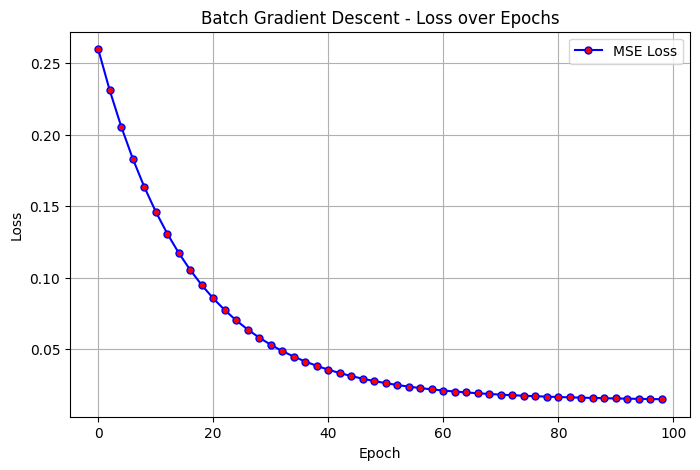

Mean Square Error And R2 score For Training Data
[0.01499205]
[62.03781285]
Mean Square Error And R2 score For Testing Data
[0.02441118]
[52.82986125]


In [ ]:
w_init = np.zeros((X_train.shape[1], 1))
b_init = 0
learning_rate = 0.01
epochs = 100
w_final, b_final = Batch_Gradient_Descent(X_train, Y_train, learning_rate, epochs, w_init, b_init)
print("Mean Square Error And R2 score For Training Data")
print(MSE(X_train,Y_train,w_final,b_final))
print(R2_score(X_train,Y_train,w_final,b_final))
print("Mean Square Error And R2 score For Testing Data")
print(MSE(X_test,Y_test,w_final,b_final))
print(R2_score(X_test,Y_test,w_final,b_final))

In [ ]:
w_init1 = np.zeros((X_train.shape[1], 1))
b_init1 = 0
learning_rate1 = 0.1
epochs1 = 100
w_last,b_last = Stochastic_Gradient_Descent(X_train, Y_train, learning_rate1, epochs1, w_init1, b_init1)
print("Mean Square Error And R2 score For Training Data")
print(MSE(X_train,Y_train,w_last,b_last))
print(R2_score(X_train,Y_train,w_last,b_last))
print("Mean Square Error And R2 score For Testing Data")
print(MSE(X_test,Y_test,w_last,b_last))
print(R2_score(X_test,Y_test,w_last,b_last))

Epoch 0: Random sample indices: [ 78  20  32  27 123 147 178 100  74 173  47  23 183 114  61 113  71  73
  13  40 101  75  94 164 111  50   0 210 199 209  69   4  31  14  21 110
  95  15 137 168 120 191 124  66  84  72  81 162 143  90 163  63 194  39
 213   5 165 211 195  42  70  62 153 152  56  89 204  87 159 185  92 151
  96 181  97  53 187 175  68 155 146  16 214 176 118  35  38 193  51 122
 144 117  30  12 138 109 134  99 142  59 166 103 131 169 148   1 188 170
  76  91  52  36 108 196 206 180  98 133 132 208  44  86  58   8 104  17
 140 127  37 145 215  22 198 139  18  79  10  28   6 190 171  88 129 172
  80  49 126 197 130 105 102 115  65 156 107 184  93 160 128 182 207  57
 158  33 135 161 201 106 200  54 174   3  55 149 192  60 154  24 202  83
  29 205 119  19 212  25 136 179  45  41 186   2   7  77 125  48  34  11
 121  26  82  43   9 116  64 177 150 189  85 157  67 203 141  46 167 112]


IndexError: index 178 is out of bounds for axis 0 with size 160

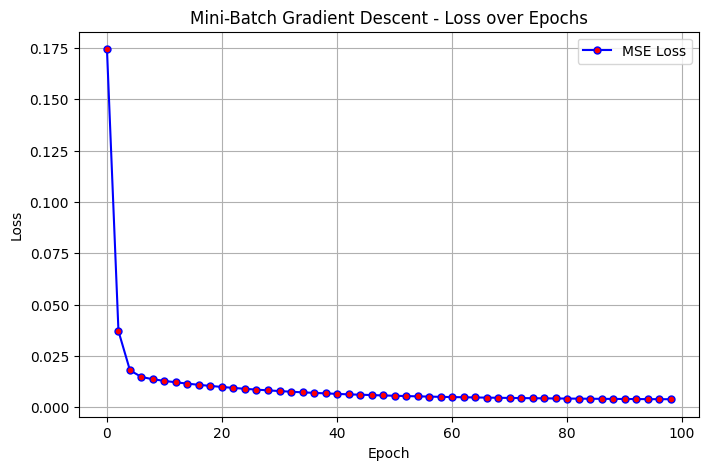

Mean Square Error And R2 score For Training Data
[0.00389529]
[90.13652709]
Mean Square Error And R2 score For Testing Data
[0.00881465]
[82.96730821]


In [ ]:
w_init = np.zeros((X_train.shape[1], 1))
b_init = 0
learning_rate = 0.01
epochs = 100
batch_size = 10
w_new, b_new = MiniBatch_Gradient_Descent(X_train, Y_train, learning_rate, epochs, w_init, b_init, batch_size)
print("Mean Square Error And R2 score For Training Data")
print(MSE(X_train,Y_train,w_new,b_new))
print(R2_score(X_train,Y_train,w_new,b_new))
print("Mean Square Error And R2 score For Testing Data")
print(MSE(X_test,Y_test,w_new,b_new))
print(R2_score(X_test,Y_test,w_new,b_new))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(Y_test, y_pred)*100
print(f"R² Score: {r2:.4f}")

R² Score: 84.4917


**LOgistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.io as pio
pio.renderers.default = "colab"


In [ ]:
df=pd.read_csv('/content/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.describe(include='O')

,Heart Disease
count,270
unique,2
top,Absence
freq,150


In [ ]:
df.nunique()

,0
Age,41
Sex,2
Chest pain type,4
BP,47
Cholesterol,144
FBS over 120,2
EKG results,3
Max HR,90
Exercise angina,2
ST depression,39


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df.Sex.value_counts()

,count
Sex,
1,183
0,87


In [ ]:
df['Chest pain type'].unique()

array([4, 3, 2, 1])

In [ ]:
att_Chest_pain =df.groupby(['Heart Disease','Chest pain type'])['Chest pain type'].count().reset_index(name='count')
att_Chest_pain

,Heart Disease,Chest pain type,count
0,Absence,1,15
1,Absence,2,35
2,Absence,3,62
3,Absence,4,38
4,Presence,1,5
5,Presence,2,7
6,Presence,3,17
7,Presence,4,91


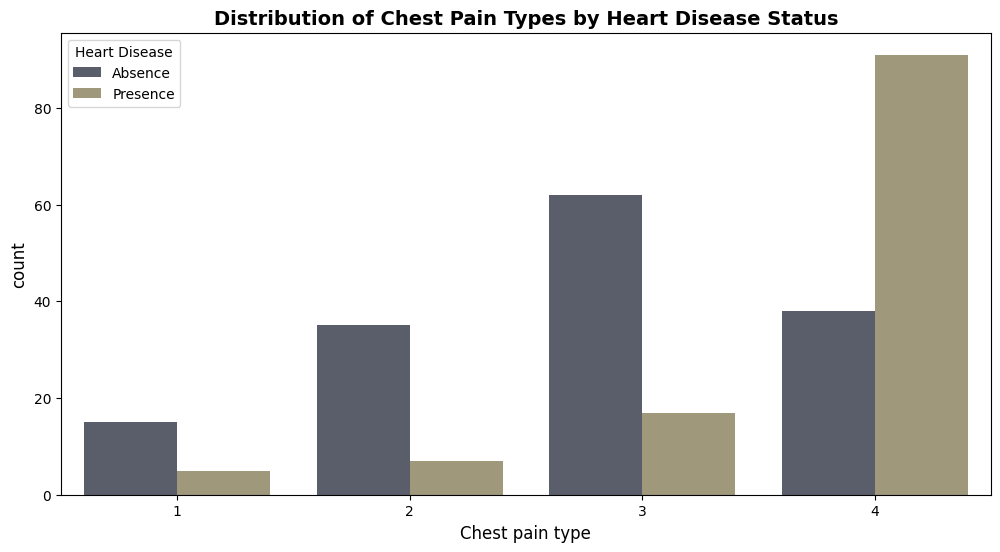

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=att_Chest_pain['Chest pain type'],y=att_Chest_pain['count'],hue=att_Chest_pain['Heart Disease'],palette="cividis")
plt.xlabel('Chest pain type',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Distribution of Chest Pain Types by Heart Disease Status', fontsize=14,fontweight='bold')
plt.show()

In [ ]:
Age_heart = (
    df.groupby(['Heart Disease', 'Age'])['Age']
    .count()
    .reset_index(name='count')
    .sort_values(by=['count'], ascending=[False])
    .head(20)
)

Age_heart

,Heart Disease,Age,count
60,Presence,58,10
19,Absence,54,10
16,Absence,51,9
62,Presence,60,9
6,Absence,41,8
17,Absence,52,8
9,Absence,44,8
7,Absence,42,7
61,Presence,59,7
64,Presence,62,7


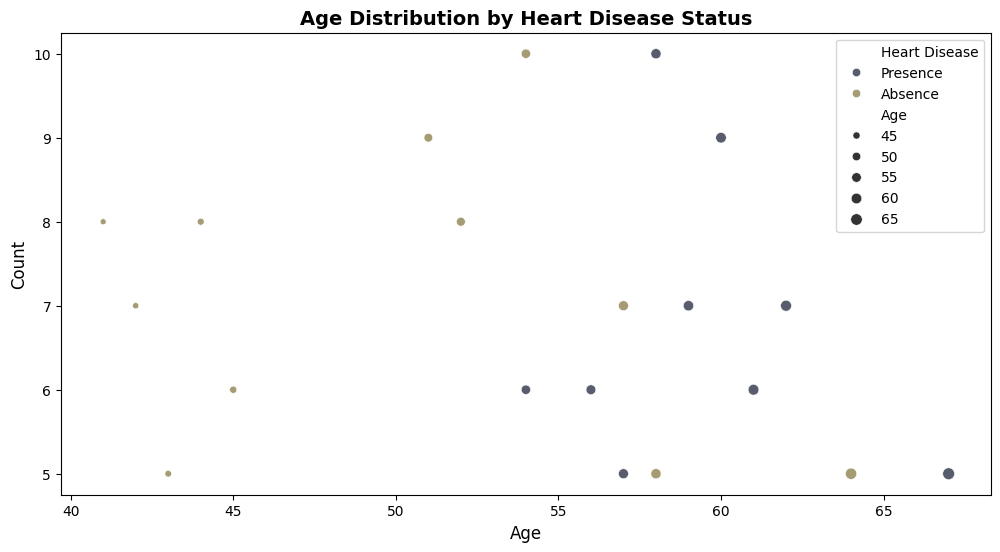

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=Age_heart['Age'], y=Age_heart['count'], hue=Age_heart['Heart Disease'],size=Age_heart['Age'],palette="cividis")

plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution by Heart Disease Status", fontsize=14,fontweight='bold')

plt.show()

In [ ]:
Sex_heart = (
    df.groupby(['Heart Disease', 'Sex'])['Sex']
    .count()
    .reset_index(name='count')
    .sort_values(by=['count'], ascending=[False])
    .head(20)
)

Sex_heart

,Heart Disease,Sex,count
3,Presence,1,100
1,Absence,1,83
0,Absence,0,67
2,Presence,0,20


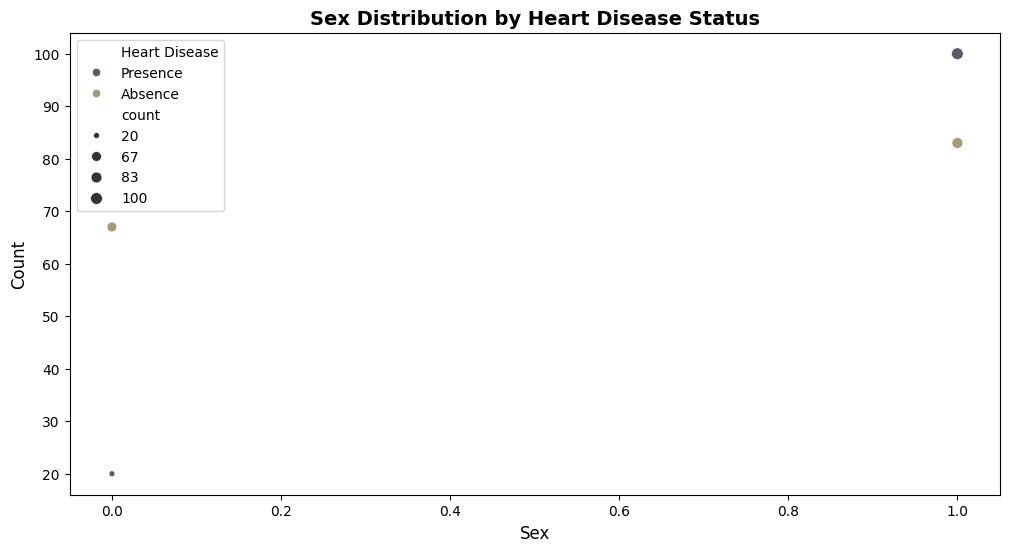

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=Sex_heart['Sex'], y=Sex_heart['count'], hue=Sex_heart['Heart Disease'],size=Sex_heart['count'],palette="cividis")

plt.xlabel("Sex", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sex Distribution by Heart Disease Status", fontsize=14,fontweight='bold')

plt.show()

In [ ]:
BP_heart = (
    df.groupby(['Heart Disease', 'BP'])['BP']
    .count()
    .reset_index(name='count')
    .sort_values(by=['BP'], ascending=[False])
)

BP_heart

,Heart Disease,BP,count
71,Presence,200,1
70,Presence,192,1
69,Presence,180,2
36,Absence,180,1
35,Absence,178,1
...,...,...,...
3,Absence,102,2
2,Absence,101,1
1,Absence,100,2
37,Presence,100,2


In [ ]:
fig = px.scatter(
    BP_heart,
    x="BP",
    y="count",
    color="Heart Disease",
    size="count",
    color_continuous_scale="cividis",
    title="BP Distribution by Heart Disease Status"
)
fig.show()

In [ ]:
Cholesterol_heart=df.groupby(['Heart Disease','Cholesterol'])['Cholesterol'].count().reset_index(name='count').sort_values(by=['Cholesterol'],ascending=[False]).head(20)
Cholesterol_heart

,Heart Disease,Cholesterol,count
98,Absence,564,1
97,Absence,417,1
182,Presence,409,1
181,Presence,407,1
96,Absence,394,1
95,Absence,360,1
94,Absence,354,1
180,Presence,353,1
179,Presence,341,1
93,Absence,340,1


In [ ]:
fig = px.scatter(
    Cholesterol_heart,
    x="Cholesterol",
    y="count",
    color="Heart Disease",
    size="count",
    color_continuous_scale="cividis",
    title="Cholesterol Distribution by Heart Disease Status"
)
iplot(fig)

In [ ]:
FBS_heart=df.groupby(['Heart Disease','FBS over 120'])['FBS over 120'].count().reset_index(name='count').sort_values(by=['FBS over 120'],ascending=[False])
FBS_heart

,Heart Disease,FBS over 120,count
1,Absence,1,23
3,Presence,1,17
0,Absence,0,127
2,Presence,0,103


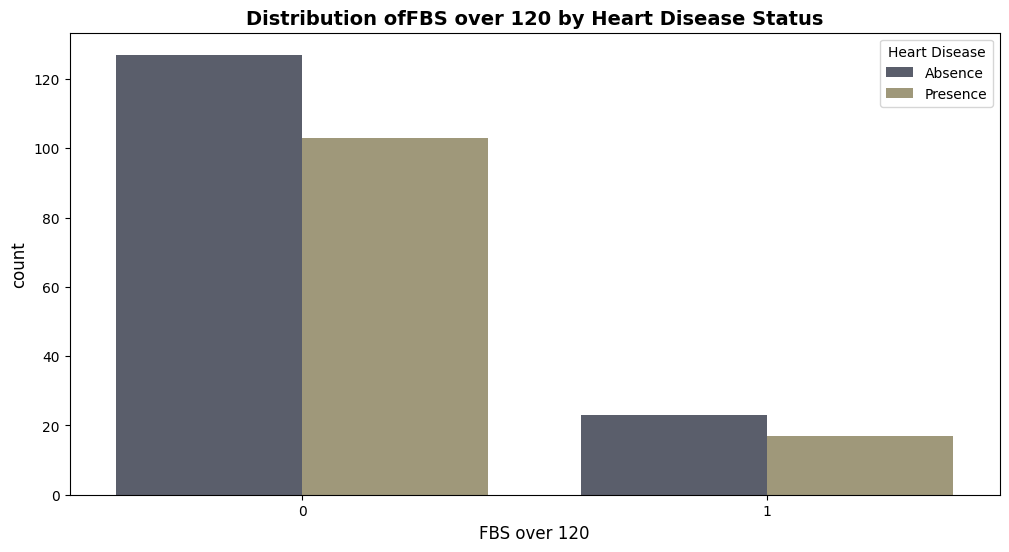

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=FBS_heart['FBS over 120'],y=FBS_heart['count'],hue=FBS_heart['Heart Disease'],palette="cividis")
plt.xlabel('FBS over 120',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Distribution ofFBS over 120 by Heart Disease Status', fontsize=14,fontweight='bold')
plt.show()

In [ ]:
EKG_heart=df.groupby(['Heart Disease','EKG results'])['EKG results'].count().reset_index(name='count').sort_values(by=['EKG results'],ascending=[False])
EKG_heart

,Heart Disease,EKG results,count
5,Presence,2,73
2,Absence,2,64
4,Presence,1,1
1,Absence,1,1
0,Absence,0,85
3,Presence,0,46


In [ ]:
fig = px.bar(
    EKG_heart,
    x="EKG results",
    y='count',
    color="Heart Disease",
    title="EKG Results vs Heart Disease",
    color_discrete_sequence=["#FF5733", "#3498DB"]
)
iplot(fig)

In [ ]:
fig = px.bar(
    df.groupby(["Exercise angina", "Heart Disease"])["Max HR"].mean().reset_index(),
    x="Exercise angina",
    y="Max HR",
    color="Heart Disease",
    barmode="group",
    title="Average Max HR by Exercise Angina & Heart Disease",
    color_discrete_sequence=["#1F77B4", "#D62728"]
)

iplot(fig)

In [ ]:
fig = px.box(
    df,
    x="Heart Disease",
    y="ST depression",
    color="Heart Disease",
    title="ST Depression Levels by Heart Disease Status",
    labels={"ST depression": "ST Depression"},
    color_discrete_sequence=["#FFC300", "#581845"]
)

iplot(fig)

In [ ]:
ST_heart=df.groupby(['Heart Disease','Slope of ST'])['Slope of ST'].count().reset_index(name='count').sort_values(by=['Slope of ST'],ascending=[False])
ST_heart

,Heart Disease,Slope of ST,count
5,Presence,3,10
2,Absence,3,8
4,Presence,2,78
1,Absence,2,44
0,Absence,1,98
3,Presence,1,32


In [ ]:
fig = px.bar(
    ST_heart,
    x="Slope of ST",
    y='count',
    color="Heart Disease",
    title="Slope of ST vs Heart Disease",
    color_discrete_sequence=["#D35400", "#1ABC9C"]
)
iplot(fig)

In [ ]:
df['Heart Disease'].replace({
    'Absence':0,
    'Presence':1
},inplace=True)
df['Heart Disease']

,Heart Disease
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


In [ ]:
data=df.drop('Heart Disease',axis=1)
label=df['Heart Disease']

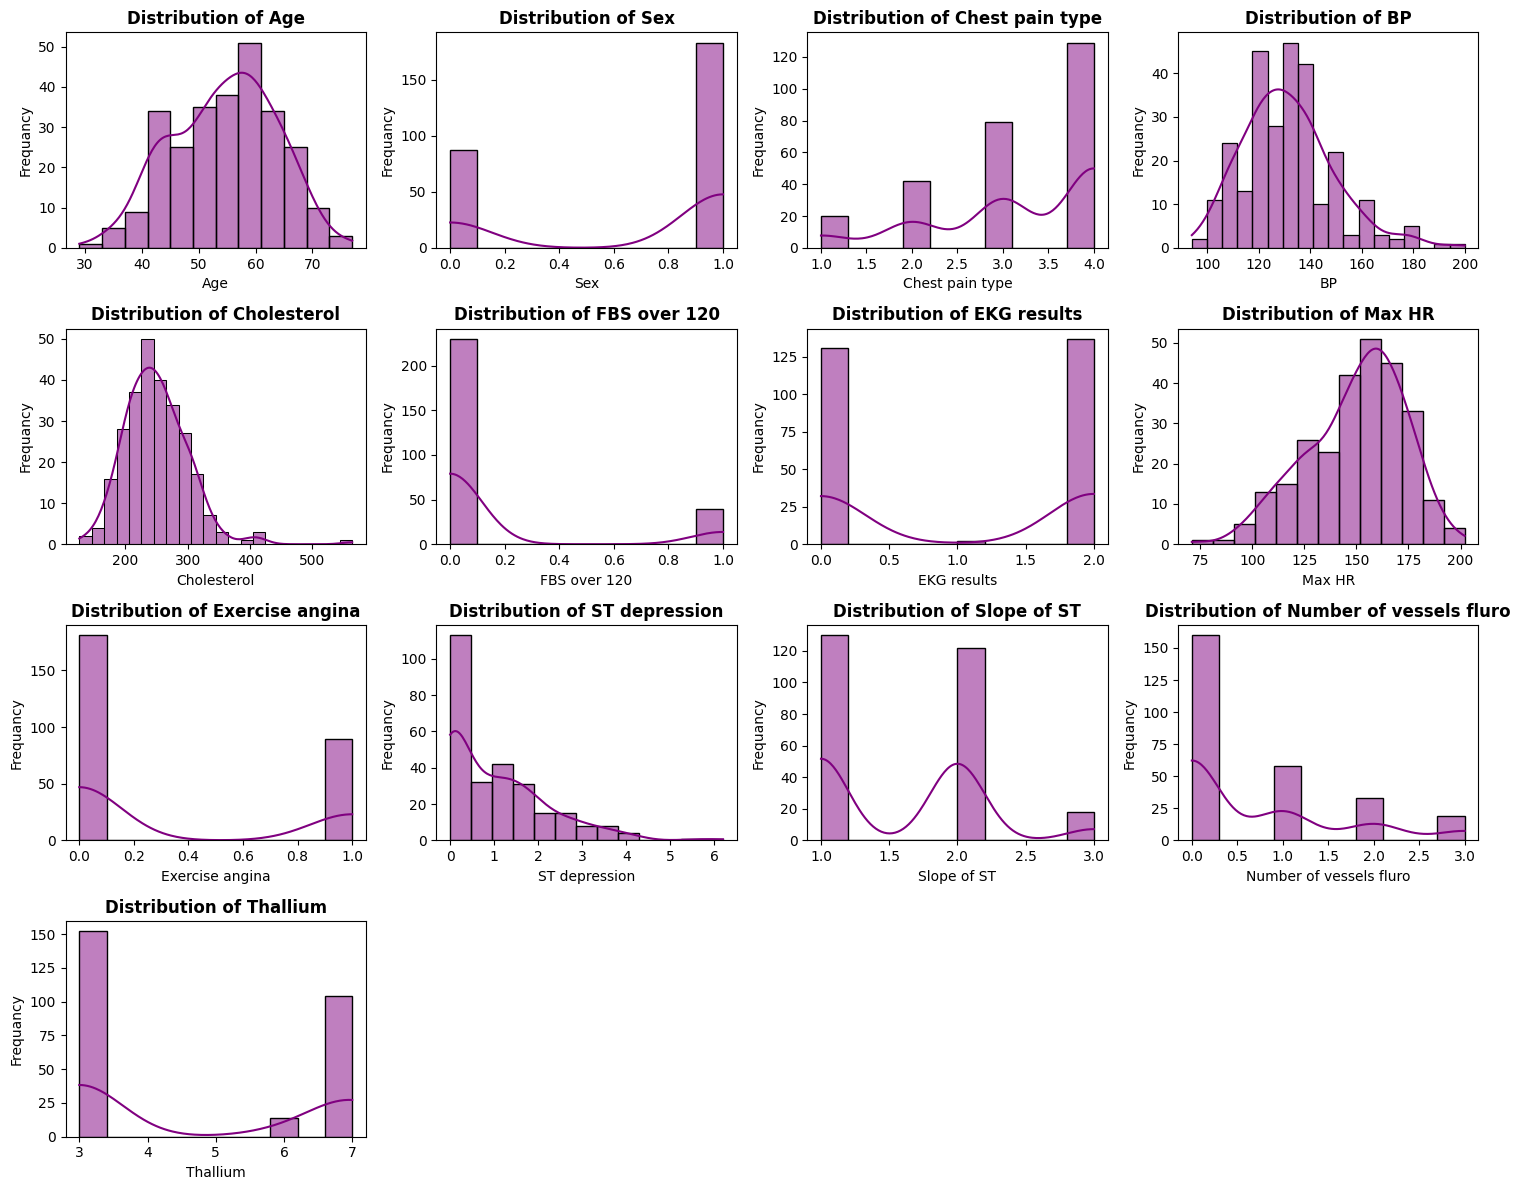

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], kde=True, color="purple")

    plt.title(f"Distribution of {col}", fontsize=12,fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequancy", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
scaler=RobustScaler()
data_scaled=scaler.fit_transform(data)
data_scaled=pd.DataFrame(data_scaled, columns=data.select_dtypes(include=['int64', 'float64']).columns)

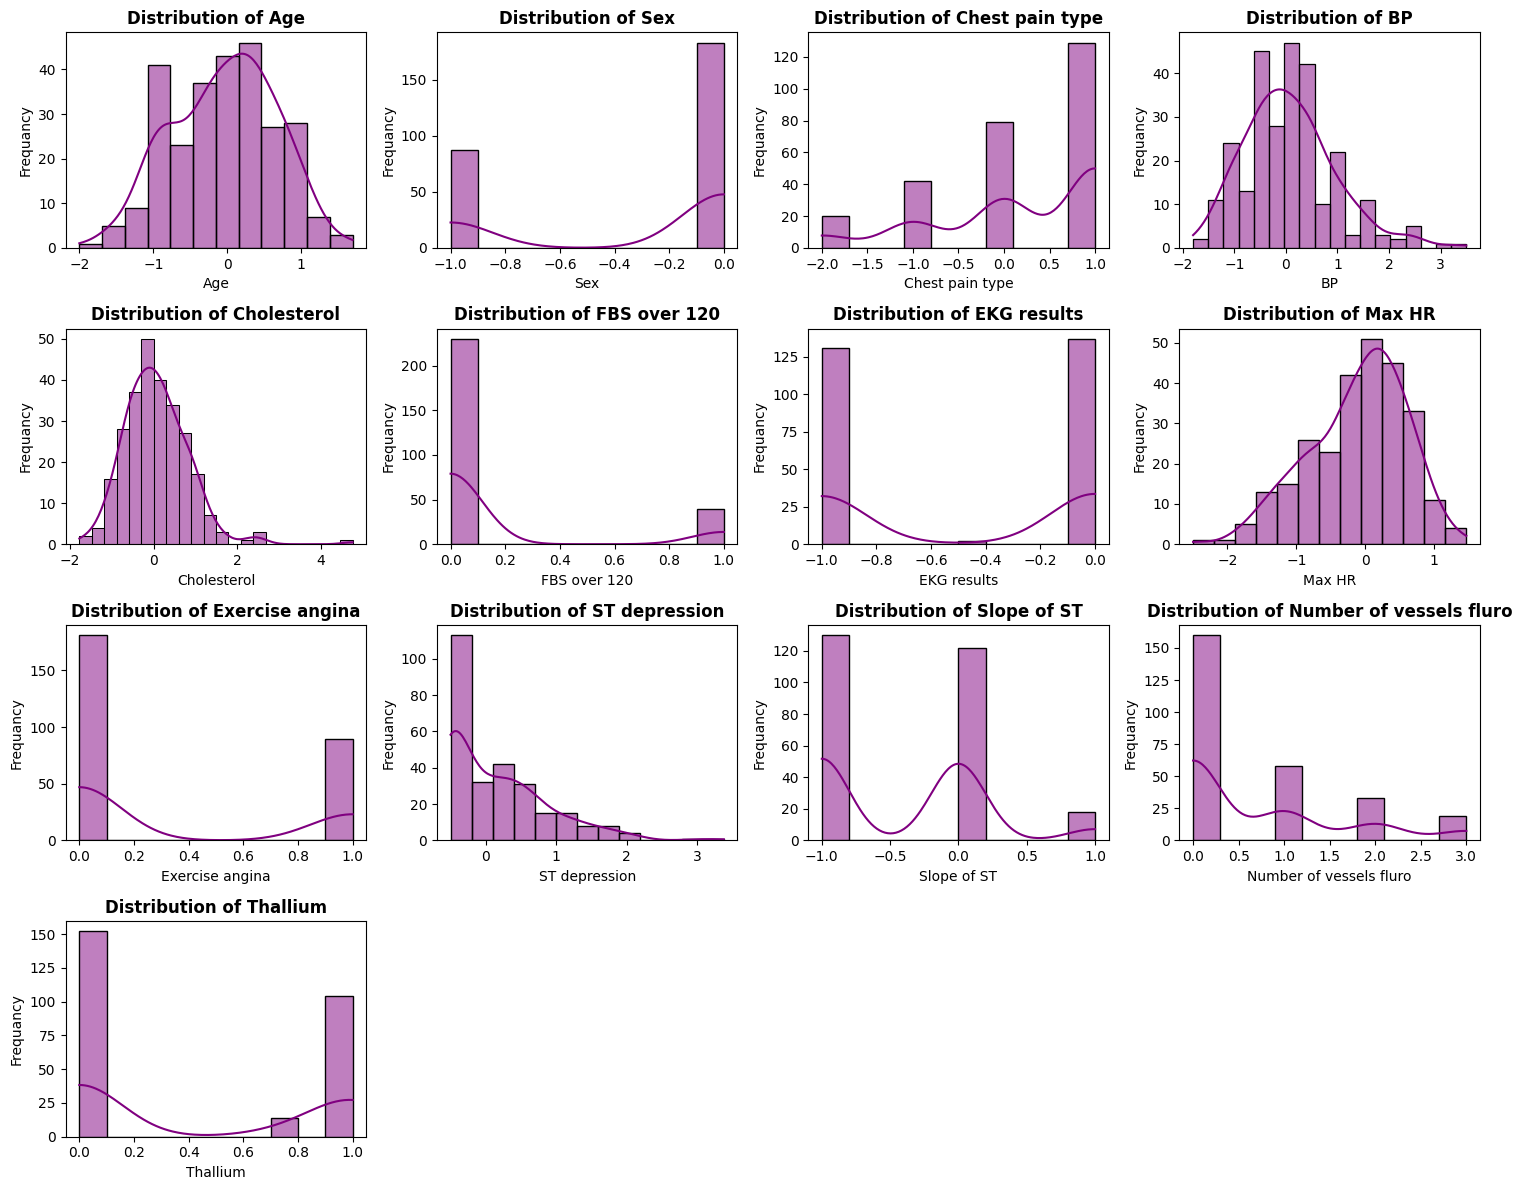

In [ ]:
numerical_cols = data_scaled.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_scaled[col], kde=True, color="purple")

    plt.title(f"Distribution of {col}", fontsize=12,fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequancy", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_scaled,label,test_size=0.2,random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]} features")
print(f"Number of classes: {len(np.unique(label))} classes")

Training set size: 216 samples
Testing set size: 54 samples
Number of features: 13 features
Number of classes: 2 classes


In [ ]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent large values
    return 1 / (1 + np.exp(-z))

In [ ]:
def computeLoss(y_pred, y_true):
    epsilon = 1e-9  # Small constant
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
loss_batch=[]
def Batch_gradient_descent(X,y,learning_rate=0.01,epochs=5000):
    m,n=X.shape
    w=np.zeros(n)
    b=0

    for e in range(epochs):
        y_pred=sigmoid(np.dot(X,w)+b)

        dw = (1/m) * np.dot(X.T,(y_pred-y))
        db = (1/m) * np.sum(y_pred-y)

        w -= learning_rate * dw
        b -= learning_rate * db

        if (e%100)==0:
            error=computeLoss(y_pred,y)
            loss_batch.append(error)
            #print(f"BGD Epoch {e}: Loss = {error:.4f}")


    return w,b

In [ ]:
def stochastic_Gradient_Descent(X, y, learning_rate=0.001, epochs=5000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    loss_Stochastic = []
    for e in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X.to_numpy()[indices], y.to_numpy()[indices]
        for i in range(m):
            X_sample = X_shuffled[i].reshape(1, -1)
            y_sample = y_shuffled[i]

            y_pred = sigmoid(np.dot(X_sample, w) + b)
            dw = np.dot(X_sample.T, (y_pred - y_sample))
            db = y_pred - y_sample

            w -= learning_rate * dw.flatten()
            b -= learning_rate * db

        if e % 100 == 0:
            error = computeLoss(y_sample, y_pred)
            loss_Stochastic.append(error)
    return w, b, loss_Stochastic

In [ ]:
def mini_Batch_Gradient_Descent(X, y, learning_rate=0.001, epochs=5000, batch_size=30):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    loss_MiniBatch = []

    for e in range(epochs):
        indices = np.random.permutation(m)  # Shuffle
        X_shuffled, y_shuffled = X.to_numpy()[indices], y.to_numpy()[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            y_pred = sigmoid(np.dot(X_batch, w) + b)
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / len(y_batch)) * np.sum(y_pred - y_batch)

            w -= learning_rate * dw
            b -= learning_rate * db

        if e % 100 == 0:
            error = computeLoss(y_batch, y_pred)
            loss_MiniBatch.append(error)
            #print(f"MBGD Epoch {e}: Loss = {loss:.4f}")

    return w, b, loss_MiniBatch

In [ ]:
def predict(X,w,b):
    y_pred= sigmoid(np.dot(X,w)+b)
    return  (y_pred >= 0.5).astype(int)

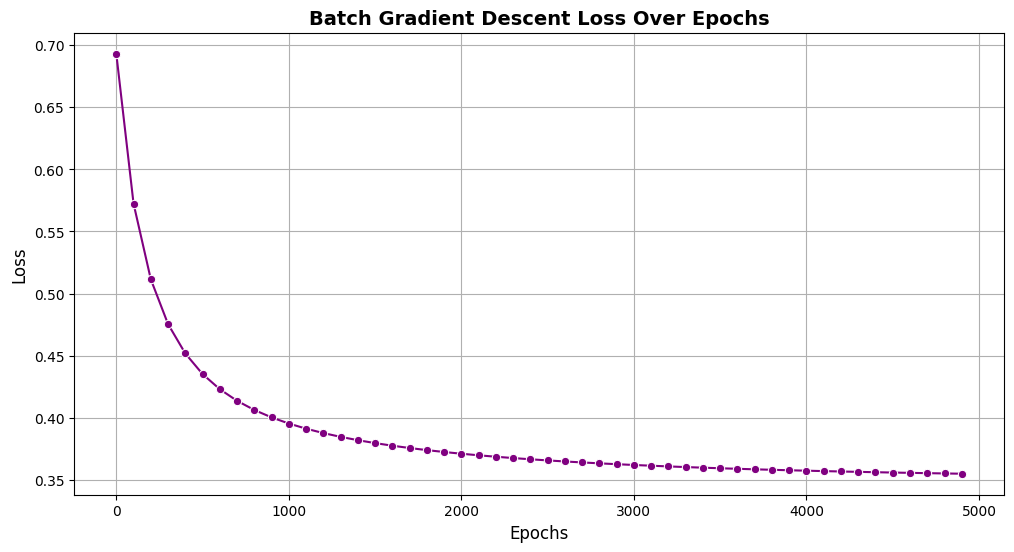

In [ ]:
w,b=Batch_gradient_descent(X_train,y_train,learning_rate=0.01,epochs=5000)
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(0, len(loss_batch) * 100, 100), y=loss_batch, marker="o", color="purple")

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Batch Gradient Descent Loss Over Epochs", fontsize=14, fontweight='bold')

plt.grid(True)
plt.show()

In [ ]:
y_pred = predict(X_test, w, b)

accuracy = np.mean(y_pred == y_test)*100
print(f"Model AccuracyBY using Batch: {accuracy:.4f}")

Model AccuracyBY using Batch: 90.7407


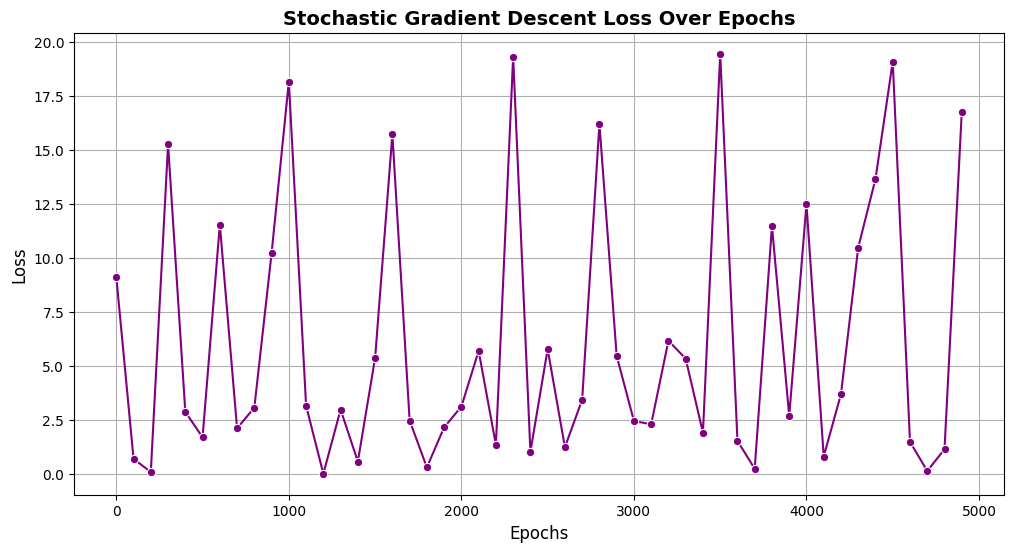

In [ ]:
w_new, b_new, loss_Stochastic = stochastic_Gradient_Descent(X_train, y_train, learning_rate=0.01, epochs=5000)
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(0, len(loss_Stochastic) * 100, 100), y=loss_Stochastic, marker="o", color="purple")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Stochastic Gradient Descent Loss Over Epochs", fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [ ]:
y_pred = predict(X_test, w_new, b_new)
accuracy = np.mean(y_pred == y_test)*100
print(f"Model AccuracyBY using Stochastic: {accuracy:.4f}")

Model AccuracyBY using Stochastic: 88.8889


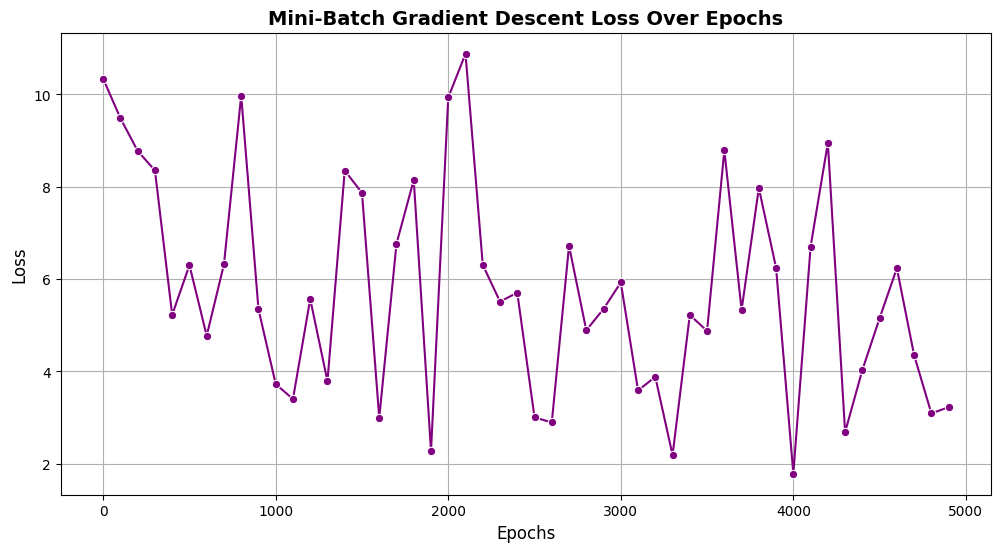

In [ ]:
w_last, b_last, loss_MiniBatch = mini_Batch_Gradient_Descent(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(0, len(loss_MiniBatch) * 100, 100), y=loss_MiniBatch, marker="o", color="purple")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Mini-Batch Gradient Descent Loss Over Epochs", fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [ ]:
y_pred = predict(X_test, w_last, b_last)

accuracy = np.mean(y_pred == y_test)*100
print(f"Model Accuracy by using Mini Batch: {accuracy:.4f}")

Model Accuracy by using Mini Batch: 90.7407


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 90.7407
